In [21]:
%matplotlib inline

import sys
import pickle
from pandas.tools.plotting import *
import pandas

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [22]:

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

In [23]:
### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )


In [24]:
# Convert the data dict to a more familiar format

df = []
for k, v in data_dict.items():
    item = v
    item["person"] = k
    df.append(item)
df= pandas.DataFrame(df)
df = df.convert_objects(convert_numeric=True)
df[['poi']] = df[['poi']].astype(bool)
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,82.000000,39.000000,49.000000,17.000000,1.020000e+02,95.000000,86.000000,86.000000,86.000000,4.0000,66.000000,93.000000,146,1.100000e+02,18.000000,95.000000,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2374234.609756,1642674.153846,-1140475.142857,166804.882353,5.987054e+06,108728.915789,608.790698,64.895349,41.232558,41962500.0000,1470361.454545,919064.967742,0.1232877,2.321741e+06,166410.555556,562194.294737,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,10713327.969046,5161929.973575,4025406.378506,319891.409747,3.106201e+07,533534.814109,1841.033949,86.979244,100.073111,47083208.7019,5942759.315498,4589252.907638,0.3298989,1.251828e+07,4201494.314703,2716369.154553,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,70000.000000,-102500.000000,-27992891.000000,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,400000.0000,69223.000000,2.000000,False,-2.604490e+06,-7576788.000000,477.000000,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,431250.000000,81573.000000,-694862.000000,98784.000000,5.278862e+05,22614.000000,22.750000,10.000000,1.000000,1600000.0000,281250.000000,1215.000000,0,2.540180e+05,-389621.750000,211816.000000,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,769375.000000,227449.000000,-159792.000000,108579.000000,1.310814e+06,46950.000000,41.000000,35.000000,8.000000,41762500.0000,442035.000000,52382.000000,0,4.517400e+05,-146975.000000,259996.000000,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1200000.000000,1002671.500000,-38346.000000,113784.000000,2.547724e+06,79952.500000,145.500000,72.250000,24.750000,82125000.0000,938672.000000,362096.000000,0,1.002370e+06,-75009.750000,312117.000000,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,97343619.000000,32083396.000000,-833.000000,1398517.000000,3.117640e+08,5235198.000000,14368.000000,528.000000,609.000000,83925000.0000,48521928.000000,42667589.000000,True,1.303223e+08,15456290.000000,26704229.000000,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [25]:
df[df.poi == True].describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,16.00000,5.000000,11.000000,0,12.000000,18.000000,14.000000,14.000000,14.000000,1,12.000000,18.000000,18,17.000000,0,17.000000,14.000000,14.000000,1.800000e+01,18.000000
mean,2074999.93750,519894.200000,-1035313.454545,NaN,10463793.666667,59873.833333,300.357143,97.785714,66.714286,81525000,1204862.416667,802997.388889,1,2318620.764706,NaN,383444.882353,1783.000000,2417.142857,7.913590e+06,9165670.944444
std,2047437.31935,912889.495638,1334971.876158,NaN,12382588.130663,37524.658812,805.844574,76.058862,158.289622,NaN,991658.258929,2417567.951133,0,3620810.575029,NaN,278359.725804,1264.996625,1961.858101,2.396549e+07,13841168.372847
min,200000.00000,10259.000000,-3504386.000000,NaN,384728.000000,16514.000000,16.000000,13.000000,4.000000,81525000,71023.000000,486.000000,True,126027.000000,NaN,158403.000000,91.000000,225.000000,9.109300e+04,126027.000000
25%,775000.00000,27610.000000,-1860244.500000,NaN,1456581.000000,31323.250000,33.000000,44.500000,12.500000,81525000,368978.000000,4979.500000,1,393818.000000,NaN,240189.000000,1059.250000,1115.750000,1.142396e+06,1016450.250000
50%,1275000.00000,202911.000000,-262500.000000,NaN,3914557.000000,50448.500000,44.500000,62.000000,15.500000,81525000,1134637.000000,149204.000000,1,985032.000000,NaN,278601.000000,1589.000000,1875.000000,1.754028e+06,2206835.500000
75%,2062500.00000,214678.000000,-122031.000000,NaN,19386043.750000,84125.000000,101.500000,135.750000,28.750000,81525000,1646772.000000,260772.500000,1,2502063.000000,NaN,415189.000000,2165.250000,2969.250000,2.665345e+06,10511334.750000
max,7000000.00000,2144013.000000,-833.000000,NaN,34348384.000000,127017.000000,3069.000000,240.000000,609.000000,81525000,3600000.000000,10359729.000000,True,14761694.000000,NaN,1111258.000000,5521.000000,7991.000000,1.035598e+08,49110078.000000


# Data Exploration

* This dataset has 146 data points and is very unbalanced with only 18 data points marked as POIs and 128 as not.
* There are 21 features and most are numeric.
* A lot of the data is missing, `loan_advances` for example has data for 4 points only. There is almost no information for `restricted_stock_deferred`, actually zero for POIs.

Let's take a look at a piece of the data.

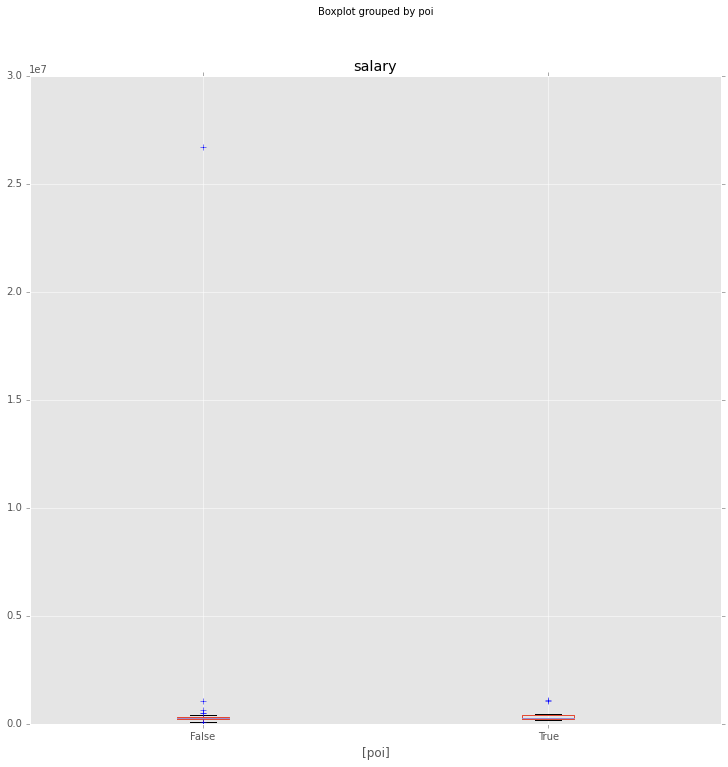

In [26]:
df[['salary', 'poi']].boxplot(by='poi', figsize=(12, 12));

Woah, definitely some outliers here. Let's check out who these guys are.

In [27]:
df.sort(['salary'], ascending=[0]).head(10)[['poi', 'person', 'salary']]

,poi,person,salary
104,False,TOTAL,26704229
95,True,SKILLING JEFFREY K,1111258
65,True,LAY KENNETH L,1072321
129,False,FREVERT MARK A,1060932
100,False,PICKERING MARK R,655037
57,False,WHALLEY LAWRENCE G,510364
128,False,DERRICK JR. JAMES V,492375
85,True,FASTOW ANDREW S,440698
52,False,SHERRIFF JOHN R,428780
88,True,RICE KENNETH D,420636


TOTAL is clearly a data entry mistake, let's remove it and plot again.

In [28]:
df = df.drop(df.index[[104]])

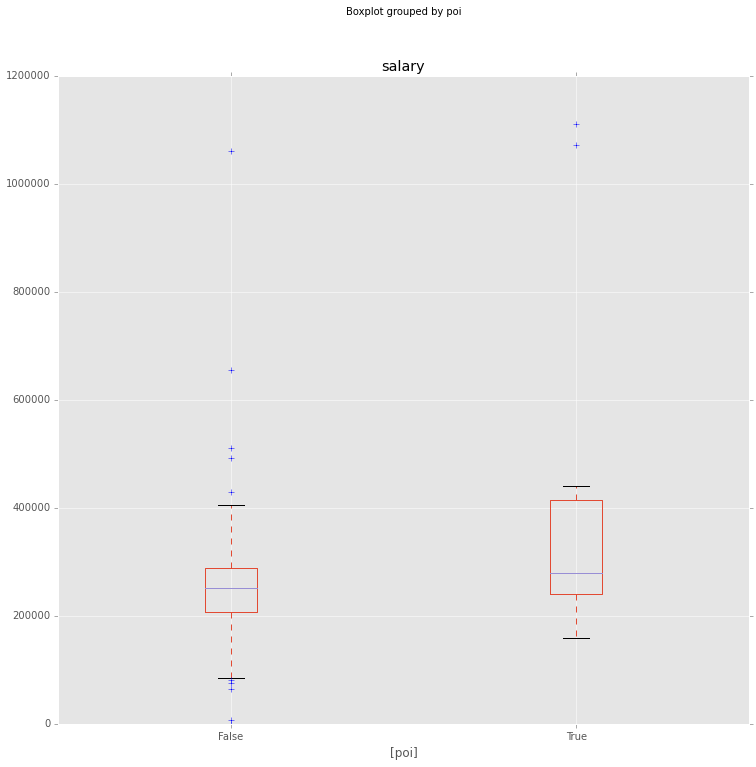

In [29]:
df[['salary', 'poi']].boxplot(by='poi', figsize=(12, 12));

Much better. We can see that that POIs tend to have bigger salaries, but we still see outliers in the non POIs.

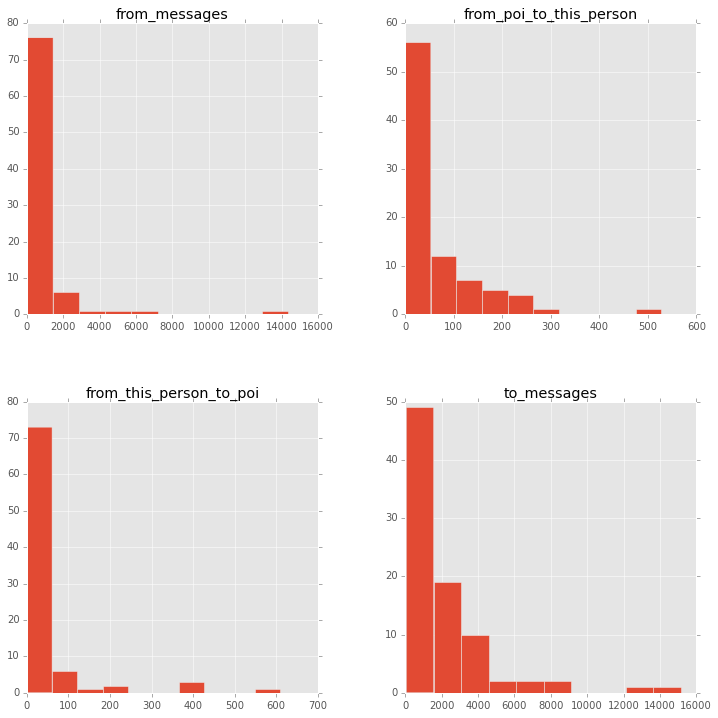

In [30]:
df[['from_poi_to_this_person', 'from_this_person_to_poi','from_messages', 'to_messages']].hist(figsize=(12, 12));

## New features

Looking at the mail exchanged features I had an insight. The idea is to extract waht percentage of total messages each person exchanged with a POI. The hipothesis is that the ratio of messages exchanged with POIs might indicate that you are a POI yourself.
Let's create these and analyze how much predicting power they would have.

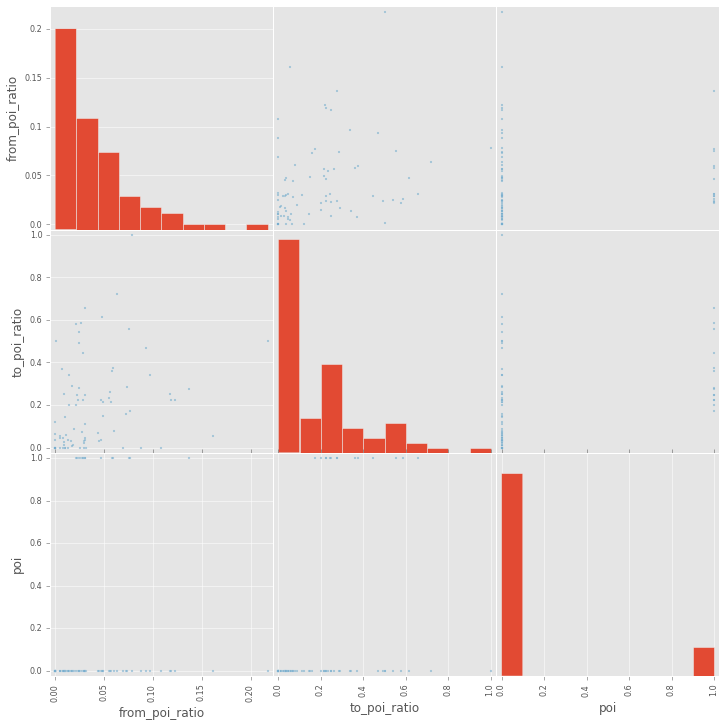

In [31]:
df['to_poi_ratio'] = df.from_this_person_to_poi / df.from_messages
df['from_poi_ratio'] = df.from_poi_to_this_person / df.to_messages
scatter_matrix(df[['from_poi_ratio', 'to_poi_ratio', 'poi']], figsize=(12, 12));

In [32]:
# Lets examine the correlation between the features and the output variable
# Using spearman because we already know the distributions are not normal
df[['poi', 'to_poi_ratio', 'from_this_person_to_poi', 'to_messages', 'from_poi_ratio' ,   'from_poi_to_this_person', 'from_messages']].corr(method='spearman')[['poi']]

,poi
poi,1.000000
to_poi_ratio,0.408599
from_this_person_to_poi,0.261205
to_messages,0.197932
from_poi_ratio,0.224880
from_poi_to_this_person,0.305633
from_messages,0.045687


### Results

to_poi_ratio achieved a correlation coefficient that was higher than any of the old variables. This seems to suggests that if you messaged more POIs that non POIs it is more likely that you are a POI yourself.

In [33]:
# TODO: Document
df = df.fillna(0)
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,to_poi_ratio,from_poi_ratio
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145,145.000000,145.000000,145.000000,145.000000,145.000000,1.450000e+02,145.000000,145.000000,145.000000
mean,671335.303448,220557.903448,-192347.524138,9911.489655,2061486.103448,35131.372414,361.075862,38.489655,24.455172,578793.103448,...,0.1241379,862546.386207,72911.572414,184167.096552,697.765517,1230.013793,2.243477e+06,2889718.124138,0.109164,0.022516
std,1230147.632511,751704.629341,604117.425636,31202.712940,4781941.261994,45247.175705,1445.944684,74.088359,79.527073,6771011.748312,...,0.3308818,2010852.212383,1297469.064327,196959.768365,1075.128126,2232.153003,8.817819e+06,6172223.035654,0.185513,0.036339
min,0.000000,-102500.000000,-3504386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,-2604490.000000,-1787380.000000,0.000000,0.000000,0.000000,0.000000e+00,-44093.000000,0.000000,0.000000
25%,0.000000,0.000000,-36666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,9.109300e+04,221141.000000,0.000000,0.000000
50%,300000.000000,0.000000,0.000000,0.000000,607837.000000,18834.000000,17.000000,4.000000,0.000000,0.000000,...,0,360528.000000,0.000000,210500.000000,114.000000,312.000000,9.161970e+05,955873.000000,0.000000,0.004885
75%,800000.000000,7961.000000,0.000000,0.000000,1668260.000000,53122.000000,52.000000,41.000000,14.000000,0.000000,...,0,698920.000000,0.000000,269076.000000,900.000000,1607.000000,1.934359e+06,2282768.000000,0.198436,0.029817
max,8000000.000000,6426990.000000,0.000000,137864.000000,34348384.000000,228763.000000,14368.000000,528.000000,609.000000,81525000.000000,...,True,14761694.000000,15456290.000000,1111258.000000,5521.000000,15149.000000,1.035598e+08,49110078.000000,1.000000,0.217341


In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn import cross_validation

X = df[df.columns-['poi','person','email_address']]
y = df.poi

# SVC is sensitive to non scaled features
min_max_scaler = MinMaxScaler()

# This dataset is way to high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features were good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

svm = SVC()

# Do grid search over k, n_components and C:

pipeline = Pipeline([("minmax", min_max_scaler), ("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1,2],
                 features__univ_select__k=[0,1,2,3],
                 svm__C=[0.1, 1, 10],
                 svm__kernel=['rbf','linear'])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cross_validation.StratifiedShuffleSplit(y, 10), verbose=1, scoring='recall')
grid_search.fit(X, y)

from sklearn.metrics import *
print(grid_search.best_estimator_.score(X,y),
precision_recall_fscore_support(y, grid_search.best_estimator_.predict(X), pos_label=1, average='binary' ))

grid_search.best_estimator_


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:   13.3s
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:   21.8s


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
(0.90344827586206899, (1.0, 0.22222222222222221, 0.36363636363636359, None))


[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:   25.4s finished


Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=1, whiten=False)), ('univ_select', SelectKBest...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [28]:
features_list = ['poi','salary']

features_list += ['bonus', 'exercised_stock_options', 'total_stock_value']
features_list += ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
features_list += ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

test_classifier(grid_search.best_estimator_, data_dict, features_list)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=1, whiten=False)), ('univ_select', SelectKBest...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
	Accuracy: 0.86093	Precision: 0.09434	Recall: 0.00500	F1: 0.00950	F2: 0.00617
	Total predictions: 15000	True positives:   10	False positives:   96	False negatives: 1990	True negatives: 12904



In [47]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn import cross_validation

X = df[df.columns-['poi','person','email_address']]
y = df.poi

# Adaboost is sensitive to non scaled features
min_max_scaler = MinMaxScaler()

# This dataset is way to high-dimensional. Better do PCA:
pca = PCA()

# Maybe some original features were good, too?
selection = SelectKBest()

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

ada = AdaBoostClassifier()

# Grid search
pipeline = Pipeline([("minmax", min_max_scaler), ("features", combined_features), ("ada", ada)])

param_grid = dict(features__pca__n_components=[0,1,5,10,20],
                 features__univ_select__k=list(range(0,len(X.columns))),
                 ada__n_estimators=[20, 25, 30, 40, 50, 100])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, scoring='f1', error_score=0)
grid_search.fit(X, y)

from sklearn.cross_validation import cross_val_score
print(grid_search.best_score_)

f1score = cross_val_score(grid_search.best_estimator_, X, y, cv=cross_validation.StratifiedShuffleSplit(y, 1000), scoring='f1')
print("F-score: %0.2f (+/- %0.2f)" % (f1score.mean(), f1score.std() * 2))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done 450 jobs       | elapsed:   10.0s
[Parallel(n_jobs=1)]: Done 800 jobs       | elapsed:   19.5s
[Parallel(n_jobs=1)]: Done 1250 jobs       | elapsed:   35.8s
[Parallel(n_jobs=1)]: Done 1800 jobs       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 1890 out of 1890 | elapsed:  1.3min finished


Fitting 3 folds for each of 630 candidates, totalling 1890 fits
0.380017683466
Accuracy: 0.23 (+/- 0.59)


In [48]:
from IPython.display import display
display(grid_search.best_estimator_.steps)

[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('features', FeatureUnion(n_jobs=1,
         transformer_list=[('pca', PCA(copy=True, n_components=1, whiten=False)), ('univ_select', SelectKBest(k=9, score_func=<function f_classif at 0x10b7c7230>))],
         transformer_weights=None)),
 ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=20, random_state=None))]

In [49]:
features_list = ['poi','salary']

features_list += ['bonus', 'exercised_stock_options', 'total_stock_value']
features_list += ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
features_list += ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

test_classifier(grid_search.best_estimator_, data_dict, features_list)

Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=1, whiten=False)), ('univ_select', SelectKBest(k=9, score_func=<function f_classif at 0x10b7c7230>))],
       transformer_weights=None)), ('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=20, random_state=None))])
	Accuracy: 0.82653	Precision: 0.26775	Recall: 0.17350	F1: 0.21056	F2: 0.18664
	Total predictions: 15000	True positives:  347	False positives:  949	False negatives: 1653	True negatives: 12051



0.1735